### А/Б-тестирование с помощью Python. Непараметрические оценки.

In [1]:
import sys
sys.version

'3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]'

In [2]:
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://www.numpy.org/
import scipy as sc #https://www.scipy.org/

import matplotlib.pyplot as plt #https://matplotlib.org/
import seaborn as sns #https://seaborn.pydata.org/
import plotly #https://plot.ly/

%matplotlib inline 

import warnings
warnings.simplefilter('ignore') #Здесь мы будем игнорировать предупреждения о грядущих изменениях вызовов sc.stats и прочего

**$H_0$** -- основная гипотеза, $\mathcal{F} = \mathcal{F_0}$  
**$H_1$** -- альтернативная гипотеза $\mathcal{F} \ne \mathcal{F_0}$

**_Критерий Колмогорова_**  
Важно: $\mathcal{F_0}$ должно быть непрерывным.

##### Задача
Собираемся открывать интернет-магазин, продавать компьютер какой-то модели Model. Мы рассматриваем цены на эту модель компьютеров в разных магазинах какой-то страны. Чтобы эффективно выйти на рынок, нам желательно поставить цену ниже некоторого "большинства", но не самую маленькую.
Собрали такие данные по 20 конкурентам: [90, 68, 51, 82, 62, 92, 85, 57, 68, 81, 70, 76, 78, 66, 80, 91, 97,
       88, 79, 76].

$H_0$: распределение имеет нормальный закон.  
$H_1$: распределение имеет какой-то другой закон.

In [3]:
X = np.array([90, 68, 51, 82, 62, 92, 85, 57, 68, 81, 70, 76, 78, 66, 80, 91, 97, 88, 79, 76])
n = X.shape[0]

# выборочное среднее
x_mean = np.mean(X)
# несмещённая выборочная дисперсия 
x_var_corr = ((x_mean - X)**2/(n-1)).sum()
# выборочное несмещённое среднеквадратическое отклонение
x_std_corr = np.sqrt(x_var_corr)
print('Параметры распределения a: {a:.2f}, var: {v:.2f}, sigma: {s:.2f}'.format(a=x_mean, v=x_var_corr, s=x_std_corr))

Параметры распределения a: 76.85, var: 150.77, sigma: 12.28


No handles with labels found to put in legend.


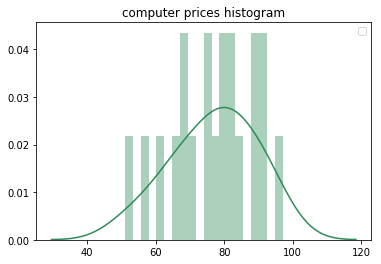

In [4]:
sns.distplot(X, color='seagreen', bins=20)
plt.title('computer prices histogram')
plt.legend()
plt.show()

In [5]:
sc.stats.kstest(X, cdf='norm', args=(x_mean, x_std_corr))

KstestResult(statistic=0.12240497269408301, pvalue=0.9253925304335257)

In [6]:
sc.stats.kstest(X, cdf='uniform', args=(X.min(), X.max()-X.min()))

KstestResult(statistic=0.1934782608695652, pvalue=0.39467998375220015)

In [7]:
X = np.random.normal(180, 2, 100)
n = X.shape[0]

# выборочное среднее
x_mean = np.mean(X)
# несмещённая выборочная дисперсия 
x_var_corr = ((x_mean - X)**2/(n-1)).sum()
# выборочное несмещённое среднеквадратическое отклонение
x_std_corr = np.sqrt(x_var_corr)
print('Параметры распределения a: {a:.2f}, var: {v:.2f}, sigma: {s:.2f}'.format(a=x_mean, v=x_var_corr, s=x_std_corr))

Параметры распределения a: 180.25, var: 3.71, sigma: 1.93


In [8]:
sc.stats.kstest(X, cdf='norm', args=(x_mean, x_std_corr))

KstestResult(statistic=0.06876239596375633, pvalue=0.7428589508211518)

In [9]:
X = np.random.uniform(50, 100, 100)

In [10]:
sc.stats.kstest(X, cdf='uniform', args=(50, 50))

KstestResult(statistic=0.07366787946122477, pvalue=0.6438602200415899)

**_Критерий Колмогорова-Смирнова_**  
Важно: $\mathcal{F_0}$ и $\mathcal{G_0}$  должны быть непрерывными.

**$H_0$** -- основная гипотеза, $\mathcal{F} = \mathcal{G}$  
**$H_1$** -- альтернативная гипотеза $\mathcal{F} \ne \mathcal{G}$

##### Задача  
Все приходящие пользователи на сайт-игру случайным образом разделялись на две группы. Первой группе показывали старую версию, второй группе новую. Для каждого пользователя мы измерили количество проведённого времени в игре в минутах.  
Оно оказалось таким:

In [11]:
X0 = np.random.normal(30, 21, 100)
Y0 = np.random.normal(35, 23, 100)

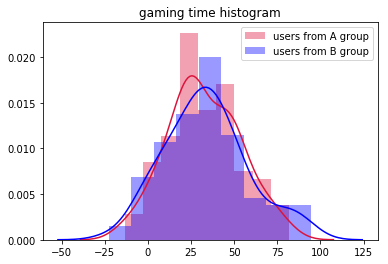

In [12]:
sns.distplot(X0, color='crimson', label='users from A group')
sns.distplot(Y0, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [13]:
sc.stats.ks_2samp(X0, Y0)

Ks_2sampResult(statistic=0.10000000000000003, pvalue=0.6766201497002454)

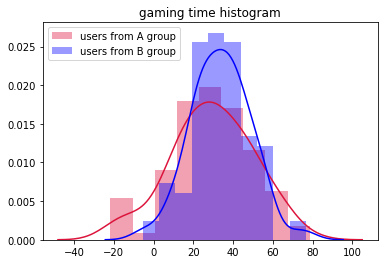

Ks_2sampResult(statistic=0.2, pvalue=0.03137665215307253)

In [14]:
X1 = np.random.normal(30, 21, 100)
Y1 = np.random.normal(35, 15, 100)
sns.distplot(X1, color='crimson', label='users from A group')
sns.distplot(Y1, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()
sc.stats.ks_2samp(X1, Y1)

**_Критерий Манна-Уитни_**  
Важно: $\mathcal{F_0}$ и $\mathcal{G_0}$  должны быть непрерывными.  
Этот критерий "не любит" много совпадающих значений, может применяться для малых выборок.

In [15]:
sc.stats.mannwhitneyu(X0, Y0)

MannwhitneyuResult(statistic=4882.0, pvalue=0.3870185673973506)

In [16]:
sc.stats.mannwhitneyu(X1, Y1)

MannwhitneyuResult(statistic=4331.0, pvalue=0.05119187357227289)

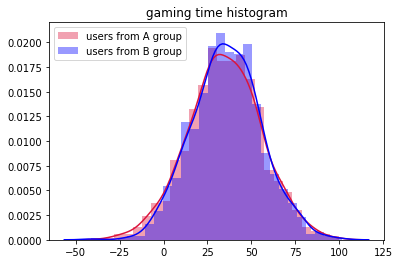

In [17]:
X2 = np.random.normal(35, 21, 1000)
Y2 = np.random.normal(35, 21, 1000)
sns.distplot(X2, color='crimson', label='users from A group')
sns.distplot(Y2, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [18]:
sc.stats.ks_2samp(X2, Y2)

Ks_2sampResult(statistic=0.041000000000000036, pvalue=0.36319895384167805)

In [19]:
sc.stats.mannwhitneyu(X2, Y2)

MannwhitneyuResult(statistic=485791.0, pvalue=0.135598400169131)

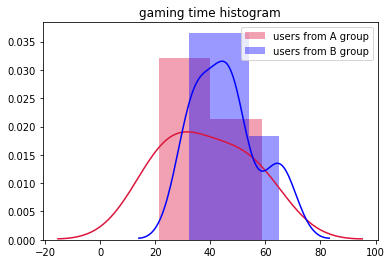

In [20]:
X2 = np.random.normal(35, 21, 5)
Y2 = np.random.normal(35, 21, 5)
sns.distplot(X2, color='crimson', label='users from A group')
sns.distplot(Y2, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.show()

In [21]:
sc.stats.ks_2samp(X2, Y2)

Ks_2sampResult(statistic=0.4, pvalue=0.6974048780205908)

In [22]:
sc.stats.mannwhitneyu(X2, Y2)

MannwhitneyuResult(statistic=9.0, pvalue=0.2654346519842541)

**Домашнее задание.**  
Попробовать сформулировать задачу A/B-тестирования функциональности сайта / эффективности магазина / измерений какого-нибудь физического эксперимента.  
Эта задача должна включать в себя:  
1. Постановку разделения выборки (случайно, равновероятно),  
2. Сбор данных (ну или искусственную генерацию),  
3. Проверку гипотез с выбором уровня значимости (критической области) заранее.